# filtration of Simpicial Complexes

2次パーシステント図:
(2, (9.0, inf))
1次パーシステント図:
(1, (5.0, 6.0))
0次パーシステント図:
(0, (1.0, inf))
(0, (2.0, 3.0))


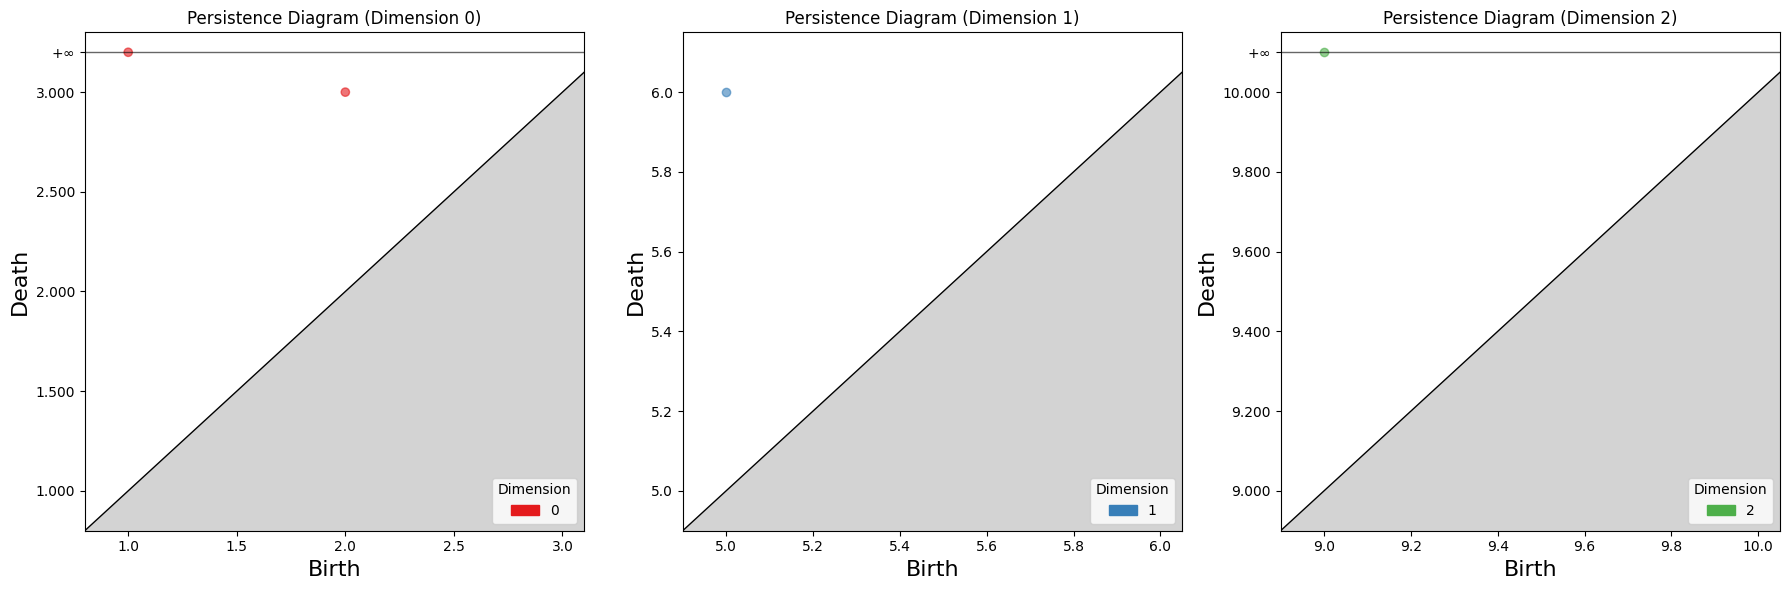

In [2]:
import gudhi
import matplotlib as mpl
# TeXを用いた描画とかがあるらしく、環境にTeXがない場合に警告がでるためTeXを使わないように設定
mpl.rcParams['text.usetex'] = False
import matplotlib.pyplot as plt

# SimplexTree の作成
st = gudhi.SimplexTree()

# フィルトレーション付き単体の追加
st.insert([1], filtration=1.0)
st.insert([2], filtration=2.0)
st.insert([1, 2], filtration=3.0)
st.insert([2, 3], filtration=4.0)
st.insert([1, 3], filtration=5.0)
st.insert([1, 2, 3], filtration=6.0)
st.insert([1, 2, 4], filtration=7.0)
st.insert([1, 3, 4], filtration=8.0)
st.insert([2, 3, 4], filtration=9.0)
st.insert([1, 2, 3, 4], filtration=float('inf'))

# パーシステントホモロジーの計算
st.compute_persistence(homology_coeff_field=2, min_persistence=0.0, persistence_dim_max=False)

# 各次元ごとにパーシステンス区間をまとめる
intervals_by_dim = {}
for p in st.persistence():
    dim = p[0]
    if dim not in intervals_by_dim:
        intervals_by_dim[dim] = []
    intervals_by_dim[dim].append(p)

# 各次元の区間を表示
for dim, intervals in intervals_by_dim.items():
    print(f"{dim}次パーシステント図:")
    for interval in intervals:
        print(interval)

# 図の描画（次元ごとにサブプロットを作成）
dims = sorted(intervals_by_dim.keys())
fig, axes = plt.subplots(1, len(dims), figsize=(6 * len(dims), 6))

if len(dims) == 1:
    axes = [axes]  # サブプロットが1つの場合もリスト化

for ax, dim in zip(axes, dims):
    gudhi.plot_persistence_diagram(intervals_by_dim[dim], axes=ax)
    ax.set_title(f"Persistence Diagram (Dimension {dim})")

plt.tight_layout()
plt.show()